# Filtro de mediana (*Median Filter*):

### Este notebook tiene como objetivo esquematizar el filtrado de una señal con ruido generada, mediante el filtro de mediana estándar.

#### Nota: se menciona que es el filtro de mediana estándar porque hay, por ejemplo, una variante que es el filtro de mediana ponderado (*Weighted Median Filter*), el cual considera distintos pesos reales asociados a cada muestra de una señal.

### Partiendo de que el filtro *Moving Average* lo que hace es promediar valores de la ventana de muestras para suavizar una señal ruidosa, la operación de un filtro de mediana es ordenar los datos asociados a las muestras de una señal para sacar la mediana correspondiente. Este proceso es comunmente aplicado para el *denoising* de un tipo de ruido conocido como *spikes*. Tiende a preservar los bordes.

### El filtro de mediana estándar va recorriendo la señal ruidosa, reemplazando cada punto de datos (hablamos de la información discretizada) con los valores medianos asociados a una vecindad de puntos de datos.

### En este caso hablamos de un filtro no lineal. Particularmente, como operador, no cumple con la definición de sacar escalares, es decir, la magnitud de una señal analógica filtrada que es escalada, no es la misma  de la señal escalada y luego filtrada: $M.F.\{k\cdot x(t)\} \neq k \cdot M.F.\{x(t)\}, k \in \mathbb{R,C}$ (escalar, en algún campo).

### Para implementar este filtro vamos a utilizar la función *medfilt()* de scipy.signal, la cual recibe una señal y un conjunto de datos de un tamaño sobre el cual se va a sacar la mediana (hablamos de la vecindad de datos puntuales que mencionábamos anteriormente, también conocido como el tamaño del kernel).

# Ejercicio:

### Vamos a generar nuevamente la famosa señal de entrada que conocemos de otros notebooks: $x(t)=sen(2\pi 2t)$ pero con ruido, la cual llamaremos $\chi (t)$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.signal import medfilt

In [3]:
# Generando el ruido y preparando el terreno para la discretización:
Fs=256 #Hz, la frecuencia de muestreo
t=np.arange(0,3, 1/Fs) #Tau [s] = 1/Fs es el periodo de muestreo
x=np.sin(2*np.pi*2*t) #Señal original 
noise=5* np.random.randn(len(t)) # Ruido aleatorio
x_ruido=x+noise #La señal con ruido generada va a ser una superposición del ruido y la señal original

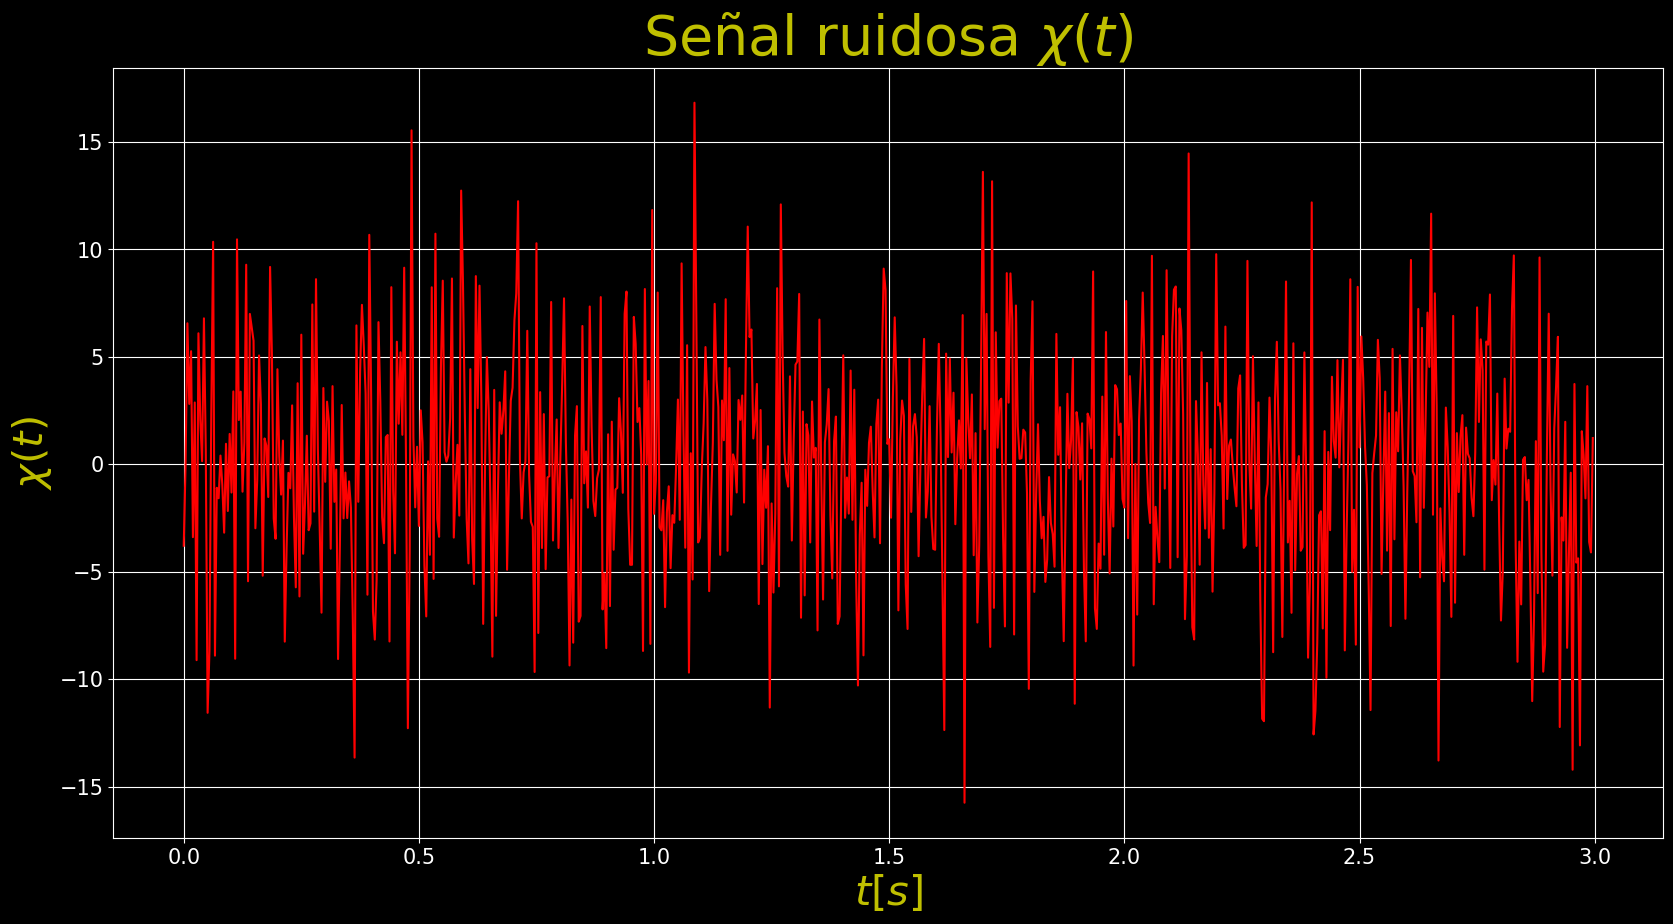

In [16]:
plt.figure(figsize = (20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.plot(t,x_ruido,'r')
plt.title(r'Señal ruidosa $\chi(t)$', color="y", fontsize = 40)
plt.xlabel('$t [s]$', color="y", fontsize = 30)
plt.ylabel('$\chi(t)$', color="y", fontsize = 30)
plt.grid(True)
plt.show()

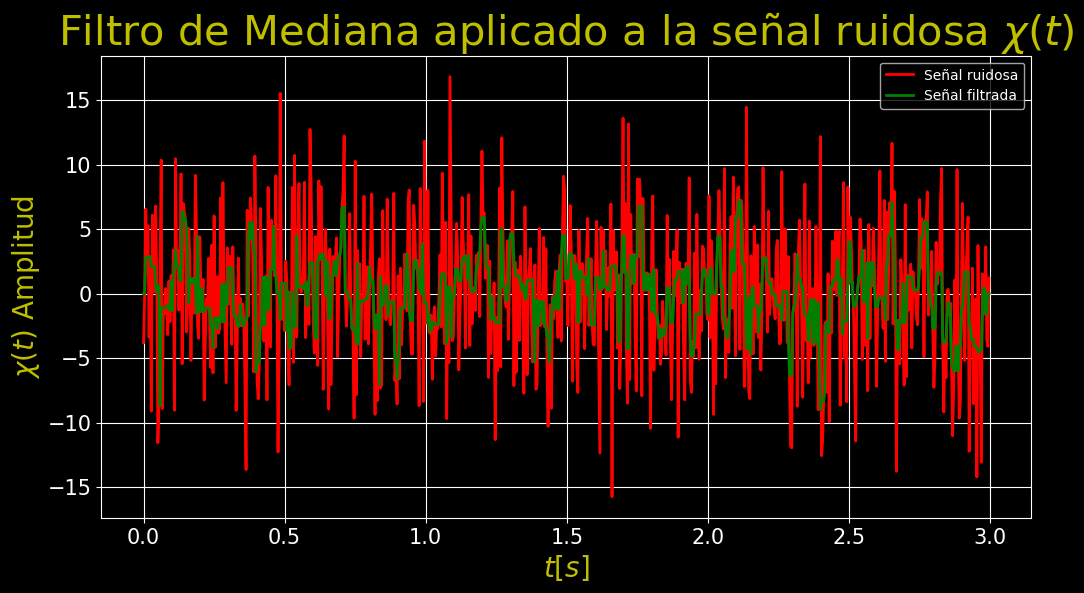

In [19]:
x_filtrada = medfilt(x_ruido, kernel_size=5) #El tamaño de la vecindad de puntos lo elegí de 5, puede variar dependiendo el criterio de selección.
plt.figure(figsize=(12, 6))
plt.plot(t, x_ruido, 'r',  label='Señal ruidosa',linewidth=2)
plt.plot(t, x_filtrada, 'g', linewidth=2, label='Señal filtrada')
plt.title('Filtro de Mediana aplicado a la señal ruidosa $\chi (t)$', fontsize=30, color="y")
plt.xlabel('$t [s]$', fontsize=20, color="y")
plt.ylabel('$\chi (t)$ Amplitud', fontsize=20, color="y")
plt.legend()
plt.grid(True)
plt.show()

# Fin del ejercicio.

# Bibliografía recomendada:

### $\blacksquare$ Arce, G. R. (2004). Nonlinear signal processing: A statistical approach. Wiley-Interscience.